In [129]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense

In [130]:
x , y = make_moons(n_samples = 200  , noise = 0.3 , random_state = 10)

In [131]:
x.shape

(200, 2)

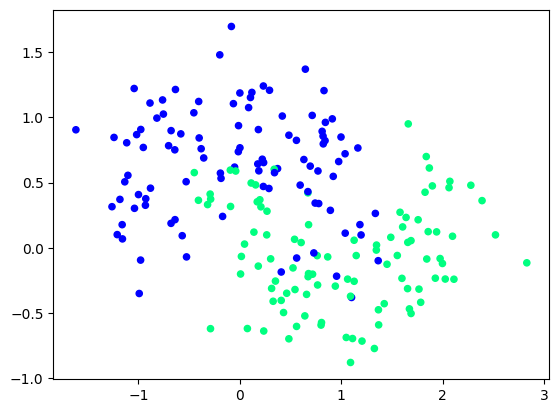

In [132]:
plt.scatter(x[:,0] , x[: , 1] , c=y , cmap = 'winter' , s = 20)

In [133]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2)

In [134]:
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

In [135]:
x_train_scaled.shape

(160, 2)

In [136]:
model = Sequential()
model.add(Dense(28 , activation = 'sigmoid' , input_dim = 2))
model.add(Dense(10 , activation = 'sigmoid'))
model.add(Dense(10 , activation = 'sigmoid'))
model.add(Dense(10 , activation = 'sigmoid'))
model.add(Dense(10 , activation = 'sigmoid'))
model.add(Dense(10 , activation = 'sigmoid'))
model.add(Dense(10 , activation = 'sigmoid'))
model.add(Dense(10 , activation = 'sigmoid'))
model.add(Dense(10 , activation = 'sigmoid'))
model.add(Dense(1 , activation = 'sigmoid'))

In [137]:
model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

In [138]:
old_weight = model.get_weights()[0]
print(old_weight)

[[-0.360386    0.2525522   0.14132208 -0.23451827  0.07848775  0.27603626
  -0.2620697   0.00537395 -0.07600886 -0.22834975  0.1978088  -0.11445385
  -0.32167307 -0.17453778 -0.18001229  0.0376226   0.36497152 -0.14819321
   0.38278472  0.1555897   0.20604968  0.37412632 -0.01748005  0.02587381
  -0.2592658   0.31749874 -0.24819249 -0.43035173]
 [ 0.42796957 -0.1052922  -0.10737103 -0.2986521   0.04516894 -0.05836514
   0.16572756 -0.2627262   0.1122461  -0.3179971  -0.10036466 -0.0230101
   0.33401972 -0.11208317  0.2533146   0.226731   -0.29560786 -0.14143795
   0.13926834  0.21081215 -0.04168308  0.28482276 -0.24551228  0.27223873
   0.25810188  0.34857333 -0.22731379 -0.29381168]]


In [139]:
history = model.fit(x_train_scaled , y_train , epochs = 50 , validation_split = 0.2)

Epoch 1/50
4/4 [==============================] - 2s 62ms/step - loss: 0.7412 - accuracy: 0.4609 - val_loss: 0.7186 - val_accuracy: 0.5000
Epoch 2/50
4/4 [==============================] - 0s 16ms/step - loss: 0.7339 - accuracy: 0.4609 - val_loss: 0.7147 - val_accuracy: 0.5000
Epoch 3/50
4/4 [==============================] - 0s 10ms/step - loss: 0.7286 - accuracy: 0.4609 - val_loss: 0.7109 - val_accuracy: 0.5000
Epoch 4/50
4/4 [==============================] - 0s 10ms/step - loss: 0.7233 - accuracy: 0.4609 - val_loss: 0.7073 - val_accuracy: 0.5000
Epoch 5/50
4/4 [==============================] - 0s 10ms/step - loss: 0.7183 - accuracy: 0.4609 - val_loss: 0.7042 - val_accuracy: 0.5000
Epoch 6/50
4/4 [==============================] - 0s 10ms/step - loss: 0.7136 - accuracy: 0.4609 - val_loss: 0.7015 - val_accuracy: 0.5000
Epoch 7/50
4/4 [==============================] - 0s 16ms/step - loss: 0.7100 - accuracy: 0.4609 - val_loss: 0.6991 - val_accuracy: 0.5000
Epoch 8/50
4/4 [===========

In [140]:
new_weight = model.get_weights()[0]
print(100*((new_weight - old_weight)/old_weight))

[[ 2.91859570e+01 -5.71637650e+01 -5.22911720e+01 -7.32699356e+01
  -1.54613342e+02  6.45769730e+01  5.71484261e+01  3.32343945e+03
   1.08569656e+02 -3.31194153e+01 -3.26853523e+01  7.30245819e+01
   5.32430725e+01  1.01971420e+02  4.97383537e+01 -3.37088837e+02
   4.67983589e+01  9.73108521e+01 -1.30729818e+00 -7.21337051e+01
   6.22736740e+01 -3.86889801e+01  6.59281616e+02  5.61457520e+01
  -3.15395775e+01 -5.38570061e+01  6.29659309e+01 -3.53523712e+01]
 [ 2.68193455e+01 -1.43645325e+02 -7.65070953e+01  5.96509209e+01
   2.87143036e+02  3.23621979e+02  9.78163605e+01  7.04712677e+01
   8.10800934e+01  2.47987099e+01 -7.03463821e+01 -4.04725830e+02
   5.47634583e+01 -1.67224319e+02  3.79486008e+01  5.95649910e+01
   6.19674492e+01 -1.10149635e+02  5.99470997e+00  5.73364487e+01
   3.32960266e+02  5.36869278e+01 -5.02257233e+01 -7.62130308e+00
  -3.42213211e+01  5.06614151e+01 -7.35750046e+01  5.39535103e+01]]


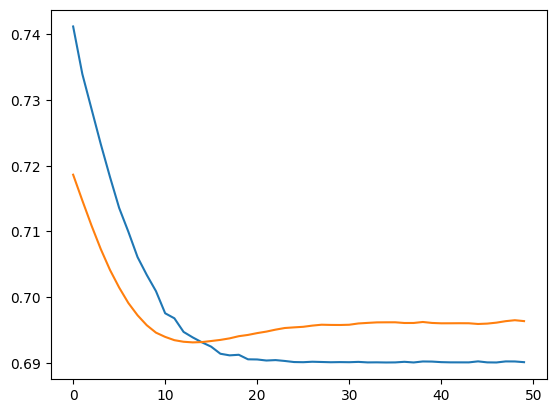

In [141]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])